Dados: Empresa que trabalha com produtos de limpezas e higiene, e os produtos precisam passar por uma checagem regular, para verificar se eles estão dentro dos padrões para serem comercializados.Um amaciante e uma caixa de sabão em pó. Analisaremos os dados conforme suas medidas e verificando se elas seguem algumas métricas das medidas de tendência central (média, mediana e moda).

In [5]:
import pandas as pd
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv")
vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [6]:
# Verificando a estatística descritiva das amostras de volume em forma de tabela
vol_amaciante.describe()

,Volume
count,1000.00000
mean,999.98970
std,0.48553
min,998.30000
25%,999.70000
50%,1000.00000
75%,1000.30000
max,1001.50000


**Como estão distribuídos os dados dos volumes da amostra do amaciante? Qual seria o seu valor central (média e mediana)?**

**Como estão distribuídos os dados dos volumes do amaciante de acordo com a mediana e os quartis? Possuo dados discrepantes?**

In [7]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

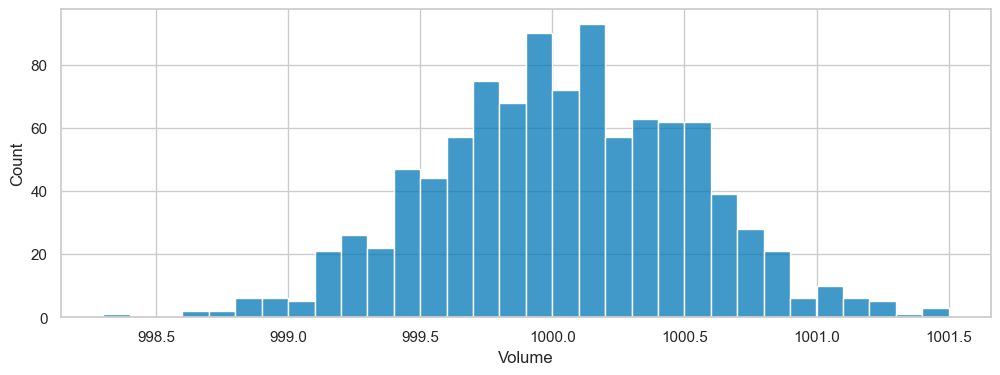

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (12,4))
sns.set_theme(style='white')

ax= sns.histplot(data= vol_amaciante, x= "Volume", binwidth=0.1, color= AZUL2)

plt.show()

Por que usar um histograma de colunas e de linhas para esses tipo de dados?

Quando desejamos saber a distribuição dos volumes, trabalhamos com uma variável de interesse (os volumes apenas)

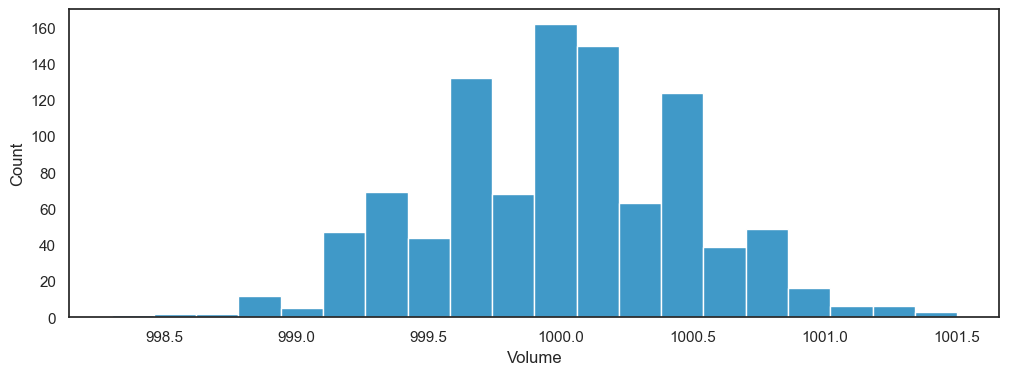

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (12,4))
sns.set_theme(style='white')

ax= sns.histplot(data= vol_amaciante, x= "Volume", bins=20, color= AZUL2) #ao inves de passar largura vai a quantidade de bins quantidade de colunas

plt.show()

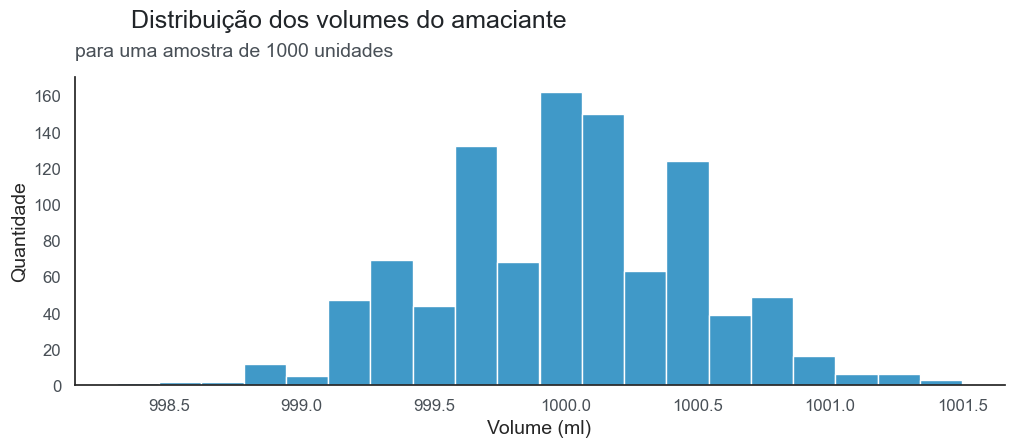

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize= (12,4))
sns.set_theme(style='white')
# Gerando o histograma sem estimativa de densidade
ax= sns.histplot(data= vol_amaciante, x= "Volume", bins=20, color= AZUL2) #ao inves de passar largura vai a quantidade de bins quantidade de colunas
# Personalizando o gráfico
plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Volume (ml)', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

plt.show()

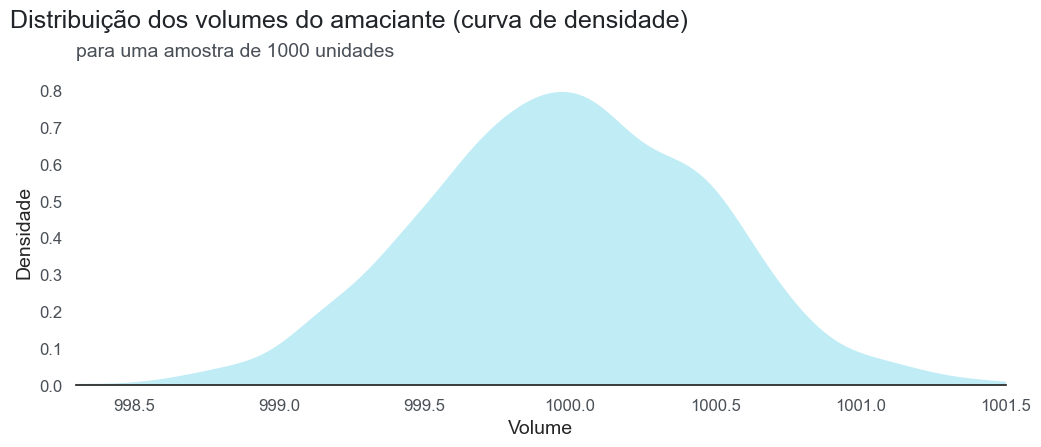

In [11]:
# Gráfico de densidade: Distribuição de uma variável para grandes volumes de dados
def grafico_densidade():
    # Importando as bibliotecas
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Criando a figura e os eixos
    fig, ax = plt.subplots(figsize=(12, 4))
    # Configurando o estilo do Seaborn
    sns.set_theme(style='white')    
    # Criando o gráfico de densidade no eixo existente
    sns.kdeplot(data=vol_amaciante, x="Volume", color=AZUL3, lw=0, fill=True, ax=ax)
    # Personalizando o gráfico
    plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', 
                 size=18, color=CINZA1, ha='right', x=0.635, y=1.05)
    plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad=15, loc="left")
    ax.set_xlabel('Volume', fontsize=14)
    ax.set_ylabel('Densidade', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
    # Removendo o eixo da esquerda
    sns.despine(left=True)
    # Retornando o objeto ax para personalizações futuras
    return ax
grafico_densidade();


Passando media mediana e moda ao grafico e traçando linhas

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

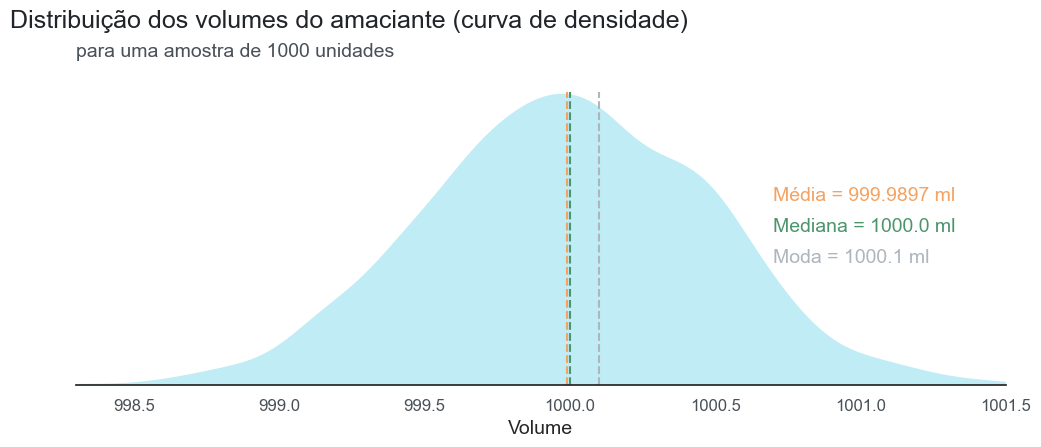

In [13]:
# Chamando a função
ax = grafico_densidade()

# Personalizando o gráfico após a criação
ax.set_ylabel('')
ax.set_yticklabels([])
estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ["Média", "Mediana", "Moda"]
cores = [LARANJA1, VERDE1, CINZA3]

# Adicionando linhas verticais no gráfico
ax.vlines(x=estat, ymin=0, ymax=0.8, colors=cores, linestyles="--")
# Anotando os valores de média, mediana e moda no gráfico
for i in range(len(estat)):
  ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} ml', fontsize=14, color = cores[i], transform=ax.transAxes)
plt.show()

In [14]:
from matplotlib.patches import Ellipse #Para sinalizar dados descrepantes
import seaborn as sns

c:\Users\Cr0l3y\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


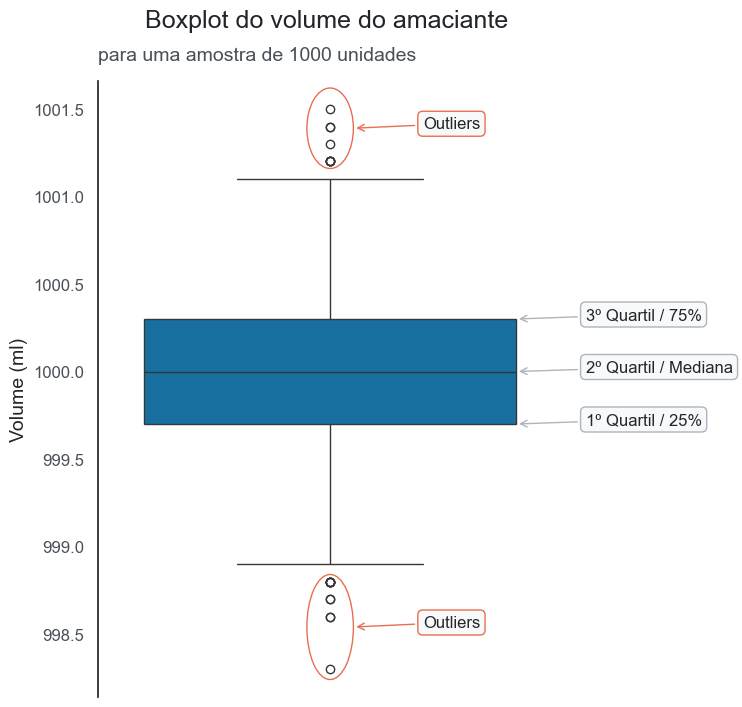

In [15]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")
sns.boxplot(data=vol_amaciante, y="Volume", orient="v", color=AZUL2, ax=ax);
## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)
# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)
# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta arrowprops
ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))

ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))
plt.show()

boxplot é ideal para passar valores de muitos dados. Também passa valores de 5 dados principais: limite superior, primeiro quartil, segundo quartil (ou mediana), terceiro quartil e limite superior

Quartis: dividem os dados ordenados em quatro partes iguais. O primeiro quartil (Q1) representa o valor abaixo do qual está 25% dos dados, o segundo quartil (Q2) representa a mediana, ou seja, o valor que divide os dados em duas partes iguais (50%), e o terceiro quartil (Q3) representa o valor abaixo do qual está 75% dos dados.

Intervalo interquartil: representado no desenho do boxplot como a caixa, o intervalo interquartil é a subtração entre o valor do terceiro quartil (Q3) pelo primeiro quartil (Q1). Ele representa a amplitude dos dados centrais, onde fica concentrada a metade dos valores. Para calculá-lo por meio da linguagem Python a partir de uma coluna de dados.

Limites máximo e mínimo: definem a faixa dos valores considerados “normais” ou “não-discrepantes”. São basicamente utilizados para identificar outliers. Geralmente, adota-se uma boa prática de determinar os limites por meio da soma, no caso do limite superior, ou subtração, no caso do limite inferior, do produto de 1,5 pelo intervalo interquartil (IIQ). Os valores fora desses dois limites são considerados outliers. Para calculá-lo por meio da linguagem Python a partir de uma coluna de dados.


In [16]:
IIQ = vol_amaciante["Volume"].quantile(0.75) - vol_amaciante["Volume"].quantile(0.25)
IIQ 

0.599999999999909

In [17]:
limite_superior = vol_amaciante["Volume"].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante["Volume"].quantile(0.25) - 1.5 * IIQ
print(f"Limite superior = {limite_superior}", f"\nLimite inferior = {limite_inferior}")

Limite superior = 1001.1999999999998 
Limite inferior = 998.8000000000002


----
----

Trabalhando com amostras de medidas do sabão em pó.

In [18]:
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
import pandas as pd
df_medidas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")

df_medidas.sample(5) #5 Amostra repetidas

,comprimento,altura,largura,amostra
580,20.00,15.00,5.08,C
509,20.05,14.95,4.94,C
760,19.95,15.05,4.99,D
935,20.02,14.98,5.01,E
676,20.00,15.00,5.06,D


In [19]:
df_medidas.describe()

,comprimento,altura,largura
count,1000.000000,1000.00000,1000.000000
mean,20.025740,14.97233,5.000050
std,0.059189,0.06294,0.051081
min,19.910000,14.69000,4.840000
25%,19.980000,14.93000,4.970000
50%,20.020000,14.99000,5.000000
75%,20.060000,15.02000,5.030000
max,20.250000,15.09000,5.190000


distribuição das medidas de comprimento da embalagem de sabão em pó para cada uma das amostras

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Cr0l3y\AppData\Local\Temp\ipykernel_24800\4068198500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data = df_medidas, x = "amostra", y = "comprimento", palette = [AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])


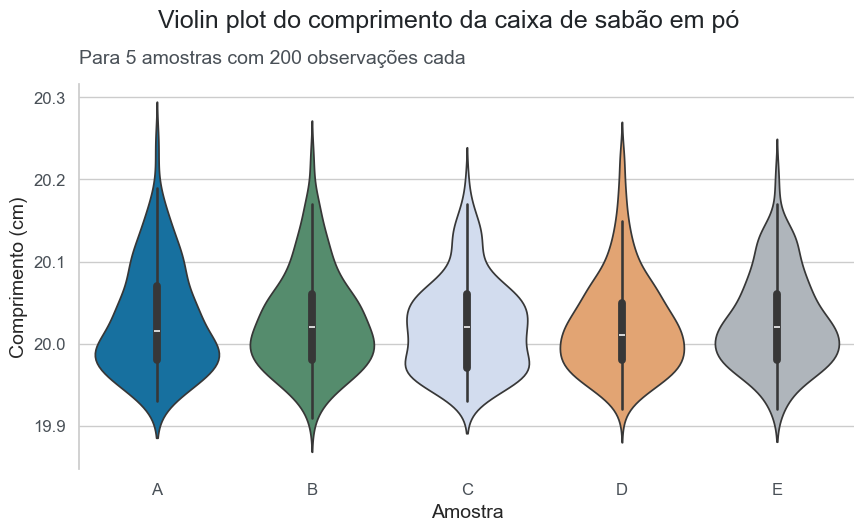

In [26]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(figsize=(10,5))
sns.set_theme(style="whitegrid")
# Gerando o violinplot de comprimento, altura e largura
ax = sns.violinplot(data = df_medidas, x = "amostra", y = "comprimento", palette = [AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3])
### Personalizando o gráfico
plt.suptitle('Violin plot do comprimento da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.785, y = 1.03)
plt.title('Para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Amostra',  fontsize = 14)
ax.set_ylabel('Comprimento (cm)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)     

plt.show()

Violin plot

Essa visualização combina características de um histograma de linha e/ou gráfico de densidade e de um boxplot.

Como estão dispostas as medidas de comprimento e altura da amostra A? Se quisermos rejeitar todos os itens em que o valor de comprimento e altura está 1% acima ou abaixo do valor de 20 e 15, respectivamente, quais seriam rejeitados?

In [27]:
df_a = df_medidas.query("amostra == 'A'")[["comprimento", "altura"]] #Pegando apenas a amostra A e pegando comprimento e altura
df_a.head()

,comprimento,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01


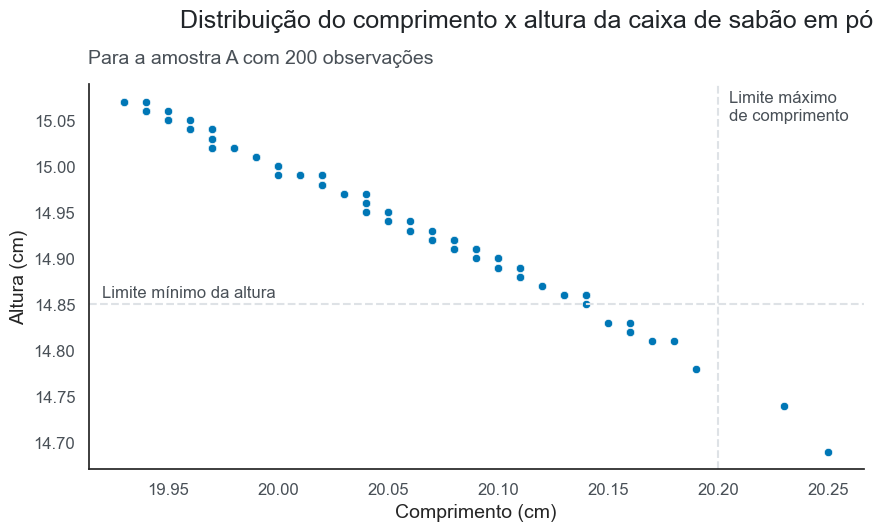

In [32]:
# Gerando a função que cria o gráfico de dispersão
def grafico_dispersao(map_cores: list=[AZUL2], pct: float=0.01): #Mapeamento por cores map_cores porcentagem pct
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots(figsize=(10,5))
    sns.set_theme(style="white")
    sns.scatterplot(data=df_a, x="comprimento", y="altura", color= map_cores,ax=ax)

    plt.suptitle('Distribuição do comprimento x altura da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.91, y = 1.03)
    plt.title('Para a amostra A com 200 observações', fontsize=14, color=CINZA2, pad = 15, loc = "left")
    ax.set_xlabel('Comprimento (cm)',  fontsize = 14)
    ax.set_ylabel('Altura (cm)', fontsize = 14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
    sns.despine()

    # Desenhando a linha horizontal com o límite mínimo de altura desejado
    ax.text(19.92, 14.855, 'Limite mínimo da altura', fontsize=12, color = CINZA2, va = "bottom")
    plt.axhline(y = 15 * (1 - pct), xmin = 0, xmax = df_a["comprimento"].max(), color = CINZA4, linestyle='--')
    
  # Desenhando a linha vertical com o límite máximo de comprimento desejado
    ax.text(20.205, 15.05, 'Limite máximo\nde comprimento', fontsize=12, color = CINZA2, ha="left")
    plt.axvline(x = 20 * (1 + pct), color = CINZA4, linestyle='--')

    return ax

ax = grafico_dispersao()

In [33]:
from matplotlib.patches import Ellipse
import numpy as np

Criaremos uma lista chamada rejeita_comp que recebera uma list comprehension. Então, ela deverá comparar cada valor da coluna de comprimento com os limites superior (20 * (1+pct)) e inferior (20 * (1-pct)). Se o valor estiver fora dessa faixa, a lista será preenchida com True, caso contrário, será preenchida com False.

Depois, criaremos outra lista, chamada rejeita_alt, seguindo um processo semelhante: compara cada valor da coluna de altura com os limites superior (15*(1+pct)) e inferior (15*(1-pct)). Se o valor estiver fora dessa faixa, a lista será preenchida com True, caso contrário, será preenchida com False.

Criamos a lista map_cores, onde os elementos recebem cores diferentes com base nas condições das listas rejeita_comp e rejeita_alt. Ou seja, os pontos que estão fora da faixa de comprimento receberão a cor VERMELHO 1; os pontos que estão fora da faixa de altura receberão a cor LARANJA 1; e os pontos que estão dentro da faixa de ambas as variáveis receberão a cor AZUL 2.

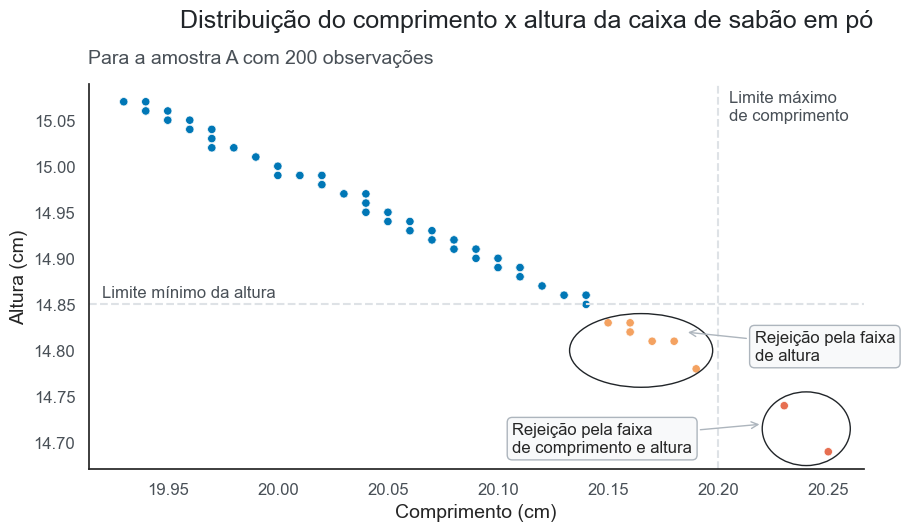

In [36]:
cores = [VERMELHO1, LARANJA1, AZUL2]

# Gerando o gráfico de dispersão e rejeitando os valores fora da faixa requisitada (1%)
pct = 0.01       
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_a["comprimento"]] #Acima de 1,1  ou abaixo e fazendo cada interação c
rejeita_alt = [True if (a > 15*(1+pct) or a < 15*(1-pct)) else False for a in df_a["altura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_alt, cores[1], cores[2]))
ax = grafico_dispersao(map_cores, pct)
# Selecionando as áreas de rejeição
rej_comp = Ellipse((20.165, 14.80), width = 0.065, height = 0.08, color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width = 0.04, height = 0.08, color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate("Rejeição pela faixa\nde altura", xy=(20.185, 14.82), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3)) 

ax.annotate("Rejeição pela faixa\nde comprimento e altura", xy=(20.22, 14.72), xycoords='data',
             bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
             xytext=(-180, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color=CINZA3))

fig = ax.get_figure()